In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### Plot sections

In [60]:
om5 = xr.open_dataset("data/IconicSamoanPassage_OM5p25_JRA55.nc")
om5['h'] = (om5['thkcello'].cumsum("zl")).compute()

/vftmp/Henri.Drake/pid8534/ipykernel_11178/3429325772.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(


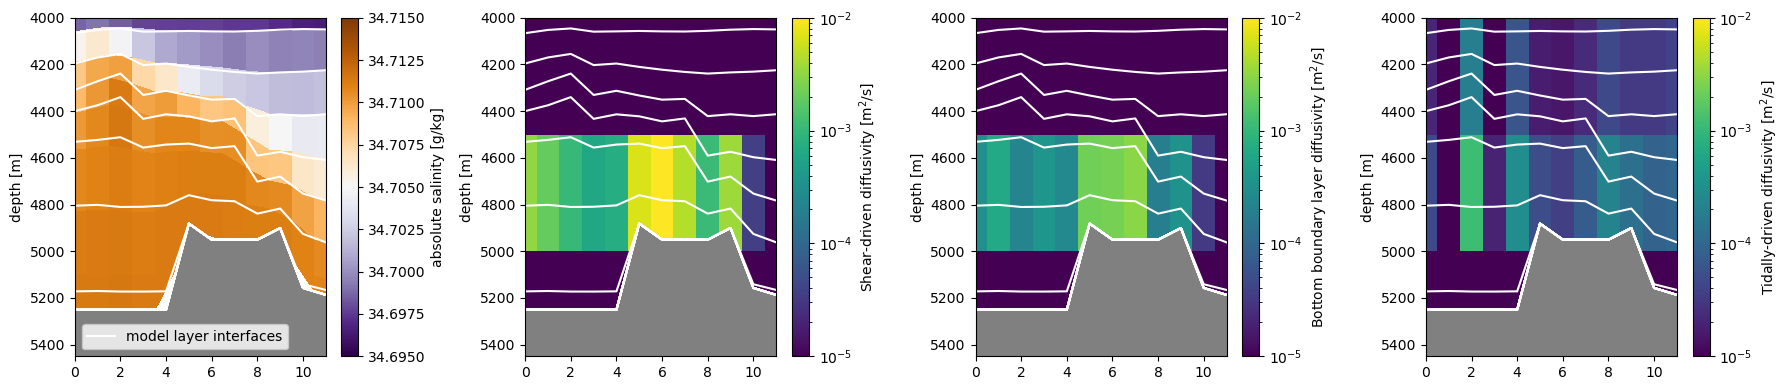

In [61]:
ds = om5

fig, axes = plt.subplots(1,4,figsize=(18, 4))

vdict = {
    "so": "absolute salinity [g/kg]",
    "Kd_shear": "Shear-driven diffusivity [m$^{2}$/s]",
    "Kd_BBL": "Bottom boundary layer diffusivity [m$^{2}$/s]",
    "Kd_itides": "Tidally-driven diffusivity [m$^{2}$/s]",
}

for (v, vlabel), ax in zip(vdict.items(), axes):

    if "Kd" in v:
        kw = {"norm": colors.LogNorm(vmin=1e-5, vmax=1e-2), "cmap": "viridis"}
    else:
        kw = {"vmin":34.695, "vmax":34.715, "cmap": "PuOr_r"}
    
    plt.sca(ax)
    if "Kd" in v:
        pc = plt.pcolormesh(
            ds.cell,
            ds.z_i,
            ds[v].where(ds[v]!=0., 1e-10).mean('time'),
            **kw
        )
    else:
        pc = plt.pcolormesh(
            ds.cell,
            ds.h.mean('time') - ds.thkcello.mean('time')/2.,
            ds[v].where(ds[v]!=0., 1e-10).mean('time'),
            **kw
        )
    plt.colorbar(pc, label=vlabel)
    plt.ylabel("depth [m]")

    label="model layer interfaces"
    for zl in ds.zl:
        plt.plot(ds.cell, ds.h.sel(zl=zl).mean('time'), color="w", label=label)
        label=None
        

    if ax==axes[0]:
        plt.legend()
    plt.fill_between(ds.cell, ds.deptho*0+6000, ds.deptho, color="gray")
    plt.ylim(5450, 4000)
    plt.xlim(0, ds.cell.max())

plt.tight_layout()

In [62]:
cm4 = xr.open_dataset("data/IconicSamoanPassage_CM4p125X_historical.nc")
cm4['h'] = cm4['thkcello'].cumsum("zl").compute()

/vftmp/Henri.Drake/pid8534/ipykernel_11178/2722062832.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(
/vftmp/Henri.Drake/pid8534/ipykernel_11178/2722062832.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pc = plt.pcolormesh(


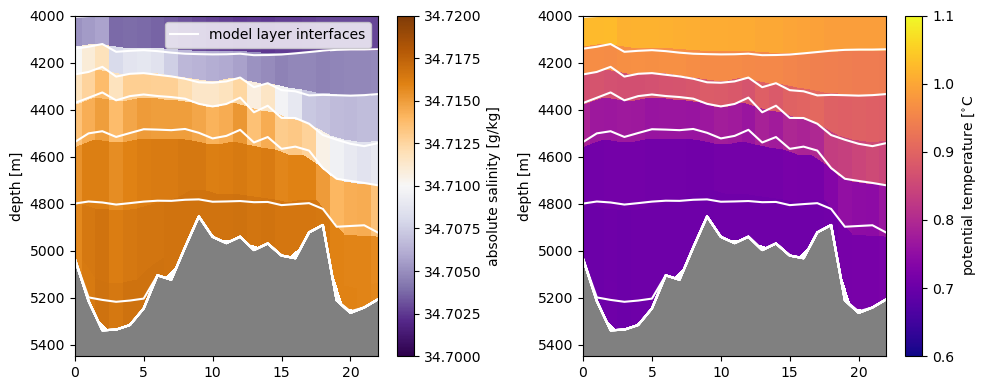

In [63]:
ds = cm4

fig, axes = plt.subplots(1,2,figsize=(10, 4))

vdict = {
    "so": "absolute salinity [g/kg]",
    "thetao": "potential temperature [$^{\circ}$C",
}

for (v, vlabel), ax in zip(vdict.items(), axes):

    if "thetao" in v:
        kw = {"vmin":0.6, "vmax":1.1, "cmap": "plasma"}
    else:
        kw = {"vmin":34.70, "vmax":34.72, "cmap": "PuOr_r"}
    
    plt.sca(ax)
    if "Kd" in v:
        pc = plt.pcolormesh(
            ds.cell,
            ds.z_i,
            ds[v].where(ds[v]!=0., 1e-10).mean('time'),
            **kw
        )
    else:
        pc = plt.pcolormesh(
            ds.cell,
            ds.h.mean('time') - ds.thkcello.mean('time')/2.,
            ds[v].where(ds[v]!=0., 1e-10).mean('time'),
            **kw
        )
    plt.colorbar(pc, label=vlabel)

    label="model layer interfaces"
    for zl in ds.zl:
        plt.plot(ds.cell, ds.h.sel(zl=zl).mean('time'), color="w", label=label)
        label=None
        

    if ax==axes[0]:
        plt.legend()
    plt.fill_between(ds.cell, ds.deptho*0+6000, ds.deptho, color="gray")
    plt.ylim(5450, 4000)
    plt.xlim(0, ds.cell.max())
    plt.ylabel("depth [m]")
    
plt.tight_layout()